<a href="https://colab.research.google.com/github/Maisho20/Machine-Learning/blob/main/Kuis/Kuis_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kuis 1

#### Nama Kelompok


1. Abdullah Kahafabi      ()
2. Dandy Wahyu Syahputra  (2141720002)
3. Jauhar Maulana A'la    (2141720186)
4. Naufal Falah Wafiuddin (2141720129)
5. Sabbaha Naufal Erwanda (2141720221)



In [ ]:
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Download dataset MNIST menggunakan torchvision
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])
mnist_dataset = torchvision.datasets.MNIST(root='/content/drive/MyDrive/Colab Notebooks/Mechine learning/Kuis 1', train=True, transform=transform, download=True)

In [ ]:
# Ekstrak data dan label
data = mnist_dataset.data
labels = mnist_dataset.targets

#### 1. Pastikan jumlah data setiap label angka (0-9). Apakah terdapat data imbalance pada dataset MNIST yang digunakan? Jelaskan jawaban kelompok Anda dan buktikan!

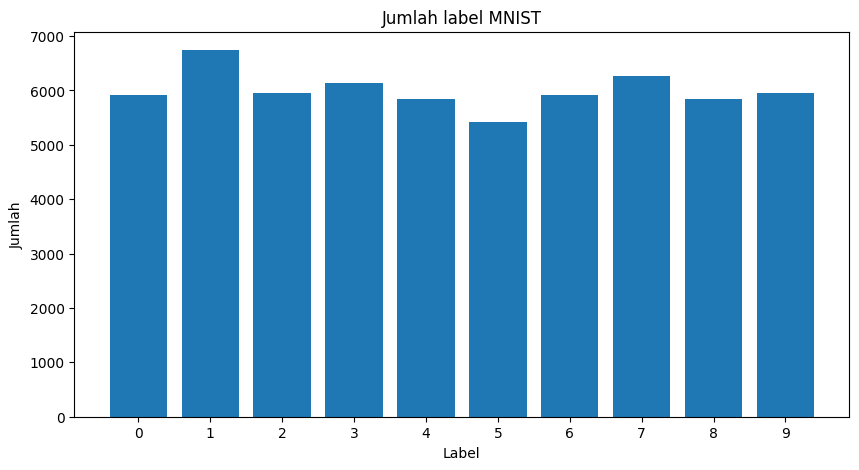

In [ ]:
# 1. Menghitung ukuran yang dijadikan label
label_counts = torch.bincount(labels)

# membuat visualisasi jumlah label
plt.figure(figsize=(10, 5))
plt.bar(range(10), label_counts)
plt.xticks(range(10), [str(i) for i in range(10)])
plt.xlabel('Label')
plt.ylabel('Jumlah')
plt.title('Jumlah label MNIST')
plt.show()

#### 2. Tampilkan 15 buah citra pertama dari dataset MNIST berserta labelnya. Anda dapat menggunakan referensi dari Job Sheet 03.

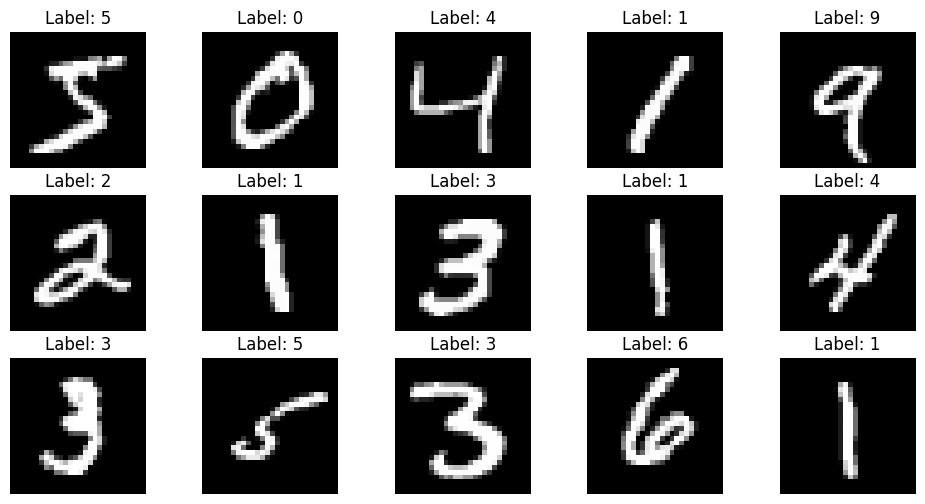

In [ ]:
# 2. Menampilkan 15 gambar beserta labelnya
plt.figure(figsize=(12, 6))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(data[i], cmap='gray')
    plt.title(f"Label: {labels[i].item()}")
    plt.axis('off')

plt.show()

#### 3.  Lakukan proses ekstraksi fitur pada data MNIST. Pada proses ini, Anda diperbolehkan untuk


* Langsung menggunakan nilai asli dari citra (nilai asli setiap pixel dari dataset) sebagai fitur
* Melakukan ekstraksi fitur lain seperti histogram, PCA, atau yang lainnya. Anda diperbolehkan melakukan ekspolarasi pada proses ini.



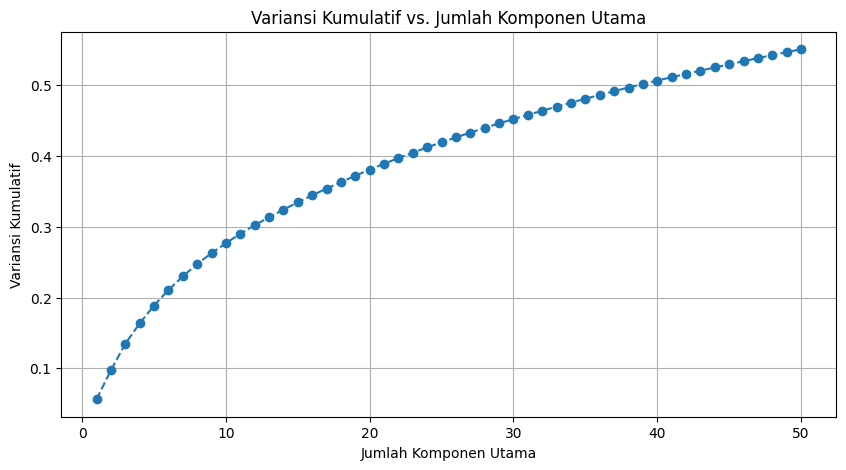

In [ ]:
# 3. Ekstraksi fitur menggunakan PCA

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# mengubah bentuk data menjadi Array 1 Dimensi
data = data.reshape(data.shape[0], -1)

# Menstandarisasi data (mean=0, variance=1)
scaler = StandardScaler()
data_std = scaler.fit_transform(data)

# Melakukan PCA dengan jumlah komponen yang diinginkan (e.g., 50)
n_components = 50
pca = PCA(n_components=n_components)
data_pca = pca.fit_transform(data_std)

# Plot the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(10, 5))
plt.plot(range(1, n_components + 1),
         cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Jumlah Komponen Utama')
plt.ylabel('Variansi Kumulatif')
plt.title('Variansi Kumulatif vs. Jumlah Komponen Utama')
plt.grid()
plt.show()


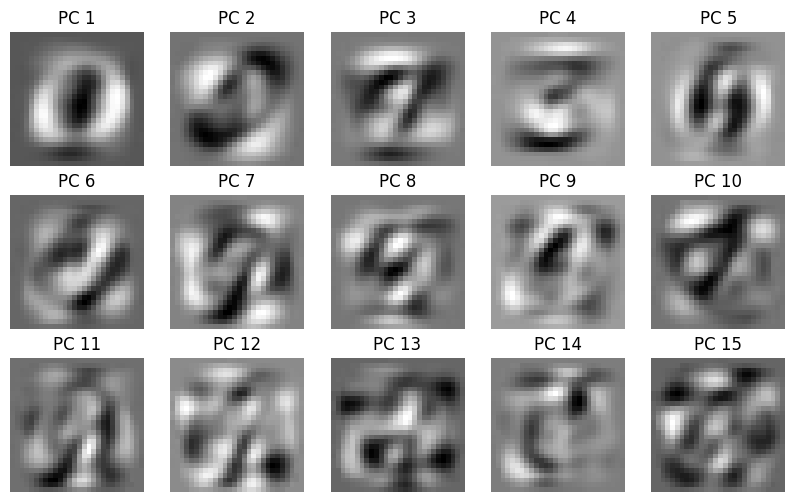

In [ ]:
# Visualisasikan 15 komponen pertama
fig, ax = plt.subplots(3, 5, figsize=(10, 6))
for i in range(15):
    axi = ax[i // 5, i % 5]
    eigendigit = pca.components_[i].reshape(28, 28)
    axi.imshow(eigendigit, cmap='gray')
    axi.set_title(f'PC {i + 1}')
    axi.axis('off')

plt.show()

#### 4. Buatlah data training dan data testing menggunakan rasio 70:30, 80:20, 90:10

In [ ]:
# 4. Split data untuk training dan testing

from sklearn.model_selection import train_test_split

# rasio 70:30
X_train, X_test, y_train, y_test = train_test_split(
    data_pca, labels, test_size=0.3)
print("Rasio 70:30")
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")
print("")

# rasio 80:20
X1_train, X1_test, y1_train, y1_test = train_test_split(
    data_pca, labels, test_size=0.2)
print("Rasio 80:20")
print(f"X_train shape: {X1_train.shape}")
print(f"y_train shape: {y1_train.shape}")
print(f"X_test shape: {X1_test.shape}")
print(f"y_test shape: {y1_test.shape}")
print("")

# rasio 90:10
X2_train, X2_test, y2_train, y2_test = train_test_split(
    data_pca, labels, test_size=0.1)
print("Rasio 90:10")
print(f"X_train shape: {X2_train.shape}")
print(f"y_train shape: {y2_train.shape}")
print(f"X_test shape: {X2_test.shape}")
print(f"y_test shape: {y2_test.shape}")


Rasio 70:30
X_train shape: (42000, 50)
y_train shape: torch.Size([42000])
X_test shape: (18000, 50)
y_test shape: torch.Size([18000])

Rasio 80:20
X_train shape: (48000, 50)
y_train shape: torch.Size([48000])
X_test shape: (12000, 50)
y_test shape: torch.Size([12000])

Rasio 90:10
X_train shape: (54000, 50)
y_train shape: torch.Size([54000])
X_test shape: (6000, 50)
y_test shape: torch.Size([6000])


#### 5. Lakukan proses klasifikasi dengan menggunakan algoritma Naive Bayes dan SVM
#### 6. Evaluasi model yang Anda buat terhadap data training dan data testing
#### 7. Tampilkan citra data testing berserta hasil pelabelannya. Anda dapat menggunakan JobSheet 03 sebagai acuan.

##### A - rbf karnel

In [ ]:
# 5A - rbf karnel
# Menggunakan rbf kernel
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

rbf_model = SVC(kernel='rbf')

# Sesuaikan SVM model dengan training data
rbf_model.fit(X_train, y_train)

# Prediksi label pada data test
y_pred = rbf_model.predict(X_test)


In [ ]:
# 6A - rbf karnel
# Evaluasi model rbf kernel
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
confusion_mtx = confusion_matrix(y_test, y_pred)

accuracy_percentage = accuracy * 100

print(f'Akurasi: {accuracy_percentage:.2f}%')
print('Hasil Klasifikasi:\n', classification_rep)
print('Penggabungan Matriks:\n', confusion_mtx)

Akurasi: 96.72%
Hasil Klasifikasi:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      1792
           1       0.98      0.98      0.98      2039
           2       0.96      0.97      0.96      1751
           3       0.95      0.96      0.95      1827
           4       0.96      0.96      0.96      1737
           5       0.98      0.95      0.96      1711
           6       0.98      0.98      0.98      1806
           7       0.96      0.96      0.96      1791
           8       0.96      0.97      0.96      1731
           9       0.95      0.95      0.95      1815

    accuracy                           0.97     18000
   macro avg       0.97      0.97      0.97     18000
weighted avg       0.97      0.97      0.97     18000

Penggabungan Matriks:
 [[1769    1    3    1    1    2    9    0    4    2]
 [   0 2001   16    5    3    0    1    3    6    4]
 [   9    7 1690    9    9    1    2   11   10    3]
 [   1    4   12 1745  

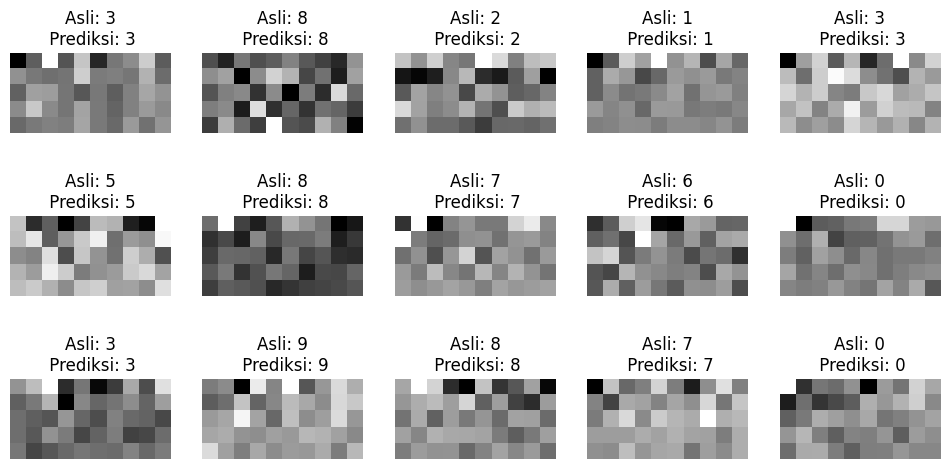

In [ ]:
# 7A - rbf karnel
# Visualisasi prediksi dari rbf kernel
plt.figure(figsize=(12, 6))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(X_test[i].reshape(5, 10), cmap='gray')
    plt.title(f'Asli: {y_test[i]}\n Prediksi: {y_pred[i]}')
    plt.axis('off')

plt.show()

##### B - polynomial karnel

In [ ]:
# 5B - polynomial kernel
# Menggunakan polynomial kernel
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

poly_model = SVC(kernel='poly', degree=3)

# Sesuaikan model SVM dengan data training
poly_model.fit(X_train, y_train)

# Prediksi label dengan data test
y_pred = poly_model.predict(X_test)


In [ ]:
# 6B - polynomial kernel
# Evaluasi polynomial kernel
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
confusion_mtx = confusion_matrix(y_test, y_pred)

accuracy_percentage = accuracy * 100

print(f'Akurasi: {accuracy_percentage:.2f}%')
print('Hasil Klasifikasi:\n', classification_rep)
print('Penggabungan Matriks:\n', confusion_mtx)

Akurasi: 96.20%
Hasil Klasifikasi:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98      1792
           1       0.98      0.98      0.98      2039
           2       0.97      0.96      0.96      1751
           3       0.95      0.94      0.95      1827
           4       0.95      0.97      0.96      1737
           5       0.97      0.96      0.96      1711
           6       0.98      0.98      0.98      1806
           7       0.97      0.95      0.96      1791
           8       0.91      0.97      0.94      1731
           9       0.94      0.94      0.94      1815

    accuracy                           0.96     18000
   macro avg       0.96      0.96      0.96     18000
weighted avg       0.96      0.96      0.96     18000

Penggabungan Matriks:
 [[1753    1    2    1    6    4    9    0   14    2]
 [   0 1992   15    6    4    0    1    3   14    4]
 [   6    2 1676    9   11    3    2    7   32    3]
 [   2    5   10 1723  

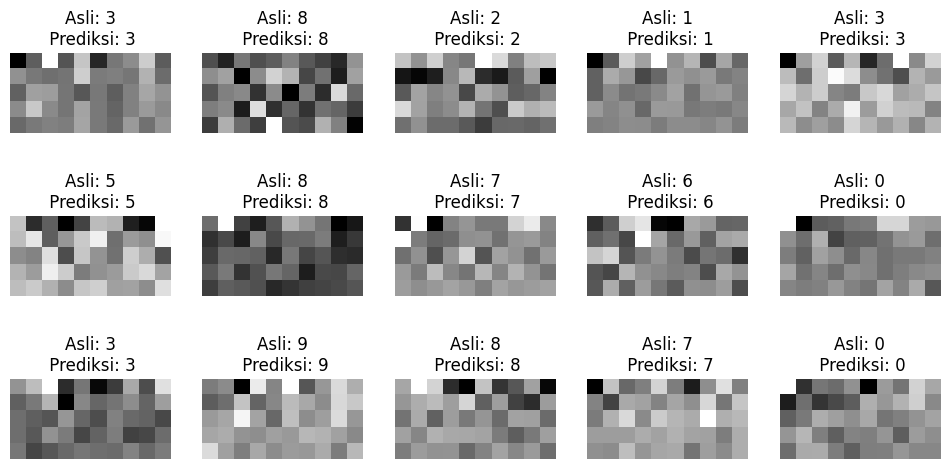

In [ ]:
# 7B - polynomial kernel
# Visualisasi prediksi dari polynomial kernel
plt.figure(figsize=(12, 6))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(X_test[i].reshape(5, 10), cmap='gray')
    plt.title(f'Asli: {y_test[i]}\n Prediksi: {y_pred[i]}')
    plt.axis('off')

plt.show()

##### C - sigmoid kernel

In [ ]:
# 5c - sigmoid kernel
# Menggunakan sigmoid kernel
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

sigmoid_model = SVC(kernel='sigmoid', degree=3)

# Sesuaikan SVM model dengan data training
sigmoid_model.fit(X_train, y_train)

# Prediksi label dengan data test
y_pred = sigmoid_model.predict(X_test)


In [ ]:
# 6c - sigmoid kernel
# Evaluasi model sigmoid
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
confusion_mtx = confusion_matrix(y_test, y_pred)

accuracy_percentage = accuracy * 100

print(f'Akurasi: {accuracy_percentage:.2f}%')
print('Hasil Klasifikasi:\n', classification_rep)
print('Penggabungan Matriks:\n', confusion_mtx)

Akurasi: 78.41%
Hasil Klasifikasi:
               precision    recall  f1-score   support

           0       0.72      0.85      0.78      1792
           1       0.89      0.94      0.91      2039
           2       0.75      0.73      0.74      1751
           3       0.76      0.78      0.77      1827
           4       0.82      0.81      0.81      1737
           5       0.72      0.66      0.69      1711
           6       0.84      0.81      0.82      1806
           7       0.78      0.81      0.79      1791
           8       0.79      0.70      0.74      1731
           9       0.75      0.73      0.74      1815

    accuracy                           0.78     18000
   macro avg       0.78      0.78      0.78     18000
weighted avg       0.78      0.78      0.78     18000

Penggabungan Matriks:
 [[1522    0   37   14   11  134   31    6   28    9]
 [   0 1915   32   23    2   12    8    9   33    5]
 [  77   43 1279   57   45   15  125   35   43   32]
 [  48   19   71 1416  

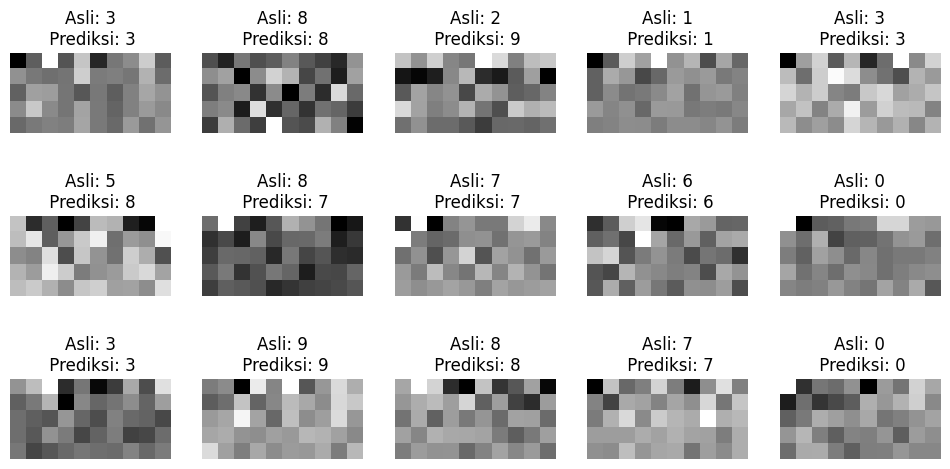

In [ ]:
# 7c - sigmoid kernel
# Visualisasi prediksi dari sigmoid kernel
plt.figure(figsize=(12, 6))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(X_test[i].reshape(5, 10), cmap='gray')
    plt.title(f'Asli: {y_test[i]}\n Prediksi: {y_pred[i]}')
    plt.axis('off')

plt.show()

##### Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Membuat model Naive Bayes
nb_model = GaussianNB()

# Melatih model pada data pelatihan
nb_model.fit(X_train, y_train)

# Melakukan prediksi pada data test
y_pred_nb = nb_model.predict(X_test)

# Evaluasi model Naive Bayes
accuracy_nb = accuracy_score(y_test, y_pred_nb)
classification_rep_nb = classification_report(y_test, y_pred_nb)
confusion_mtx_nb = confusion_matrix(y_test, y_pred_nb)

accuracy_percentage_nb = accuracy_nb * 100

print(f'Akurasi Naive Bayes: {accuracy_percentage_nb:.2f}%')
print('Hasil Klasifikasi Naive Bayes:\n', classification_rep_nb)
print('Penggabungan Matriks Naive Bayes:\n', confusion_mtx_nb)


Akurasi Naive Bayes: 71.73%
Hasil Klasifikasi Naive Bayes:
               precision    recall  f1-score   support

           0       0.80      0.93      0.86      1792
           1       0.85      0.93      0.89      2039
           2       0.61      0.60      0.61      1751
           3       0.82      0.59      0.68      1827
           4       0.67      0.83      0.74      1737
           5       0.81      0.60      0.69      1711
           6       0.92      0.70      0.79      1806
           7       0.87      0.47      0.61      1791
           8       0.49      0.80      0.61      1731
           9       0.61      0.71      0.66      1815

    accuracy                           0.72     18000
   macro avg       0.75      0.71      0.71     18000
weighted avg       0.75      0.72      0.72     18000

Penggabungan Matriks Naive Bayes:
 [[1659    0   43    3    7   22   17    1   40    0]
 [   0 1895   17    5    4   11    6    7   91    3]
 [  65   31 1058   88  117   23   33    

#### 8. Apa model terbaik yang Anda dapatkan? Bagaimana konfi gurasinya? Berapa tingkat akurasi yang didapatkan? Jelaskan!

model yang terbaik adalah menggunakan **rbf kernel** dengan akurasi mencapai 96,79%. untuk konfigurasi menggunakan library svm dengan memilih **rbf** sebagai kernelnya